In [37]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kstest, wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Programming\LHL-data-notes\Final\data\combinedsent.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_12320\1244737427.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'D:\Programming\LHL-data-notes\Final\data\combinedsent.csv')


In [3]:
df.drop(['Unnamed: 0.3','Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0','review_text','original_title','original_publication_day','original_publication_month','rev_year','rev_month'],axis=1, inplace=True)

In [4]:
df.head()

,book_id,rating,text_reviews_count,original_publication_year,rating_dist,ratings_count,month_diff,time_cat,BERT_sent
0,2767052,5,156575.0,2008,5:2768578|4:1519190|3:577431|2:132128|1:69269|...,5066596.0,102.0,120.0,0.345510
1,7260188,5,96736.0,2010,5:749202|4:627098|3:378562|2:112136|1:30653|to...,1897651.0,60.0,5.0,0.943165
2,6148028,5,89071.0,2009,5:992769|4:696715|3:265971|2:48866|1:10703|tot...,2015024.0,71.0,120.0,0.925718
3,2767052,5,156575.0,2008,5:2768578|4:1519190|3:577431|2:132128|1:69269|...,5066596.0,83.0,120.0,0.965139
4,13206828,5,20635.0,2014,5:108214|4:59427|3:15611|2:2179|1:910|total:18...,186341.0,43.0,5.0,0.837865


In [5]:
df1 = df[df.isna().any(axis=1)]
df1.head(20)

,book_id,rating,text_reviews_count,original_publication_year,rating_dist,ratings_count,month_diff,time_cat,BERT_sent
13,13188676,5,12163.0,2014,5:58692|4:22511|3:8742|2:2446|1:1303|total:93694,93694.0,0.0,NaN,0.766337
34,33807229,4,923.0,2017,5:1614|4:1537|3:964|2:249|1:80|total:4444,4444.0,0.0,NaN,0.471625
35,33280872,4,2603.0,2017,5:6112|4:4730|3:2673|2:853|1:447|total:14815,14815.0,0.0,NaN,0.587761
37,28919058,4,517.0,2017,5:1034|4:646|3:136|2:28|1:10|total:1854,1854.0,0.0,NaN,0.962263
38,29519514,4,3807.0,2016,5:12688|4:10258|3:5197|2:1489|1:492|total:30124,30124.0,0.0,NaN,0.878765
39,29519517,4,2682.0,2016,5:8649|4:8100|3:4727|2:1440|1:453|total:23369,23369.0,0.0,NaN,0.934712
40,25912358,4,3141.0,2016,5:8692|4:2971|3:1687|2:749|1:487|total:14586,14586.0,0.0,NaN,0.958636
41,28678119,4,5894.0,2016,5:20218|4:14391|3:7207|2:2495|1:1736|total:46047,46047.0,0.0,NaN,0.909770
42,24422492,4,5047.0,2015,5:14504|4:13956|3:6809|2:1348|1:318|total:36935,36935.0,0.0,NaN,0.955857
43,24378015,5,8588.0,2015,5:23983|4:20604|3:9585|2:2373|1:930|total:57475,57475.0,0.0,NaN,0.956849


In [8]:
df.to_csv('data/data_relevant.csv')

In [9]:
df = pd.read_csv(r'D:\Programming\LHL-data-notes\Final\data\data_relevant.csv')

In [10]:
# get rid of everything except the variables. Max min is appropriate.
# Both variables are measuring sentiment so they are directly comparible
# Likert scales can be considered continuous
# max min scales INDIVIDUALLY around the variance while keeping the distances consistent
# unlike standard scalar which adds space at the polar values
df_rs_compare = df[['rating','BERT_sent']]

In [11]:
# drop zeros because that means they didn't rate it
df_rs_compare = df_rs_compare.loc[(df_rs_compare[['rating']] != 0).all(axis=1)]

In [12]:
df_rs_compare.describe()

,rating,BERT_sent
count,3.937189e+06,3.937189e+06
mean,3.962227e+00,6.991297e-01
std,1.050085e+00,2.713558e-01
min,1.000000e+00,1.825065e-02
25%,3.000000e+00,5.130926e-01
50%,4.000000e+00,8.090196e-01
75%,5.000000e+00,9.257182e-01
max,5.000000e+00,9.869946e-01


In [13]:
scaler = MinMaxScaler()
scaler.fit(df_rs_compare)
rs_compare = scaler.transform(df_rs_compare)

In [14]:
scaled_compare_df = pd.DataFrame(rs_compare, index=df_rs_compare.index, columns=df_rs_compare.columns)

In [15]:
scaled_compare_df.head()

,rating,BERT_sent
0,1.0,0.337818
1,1.0,0.954757
2,1.0,0.936747
3,1.0,0.977440
4,1.0,0.846058


In [16]:
# Should we do a paired t-test(need normal-ish distribution) or a Wilcoxin sign rank?
# Check for normality

ks_statistic, p_value = kstest(scaled_compare_df.rating, 'norm')
print(ks_statistic, p_value)

ks_statistic2, p_value2 = kstest(scaled_compare_df.BERT_sent, 'norm')
print(ks_statistic2, p_value2)

0.5938781187392758 0.0
0.5068080708919175 0.0


c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Rating distribution')

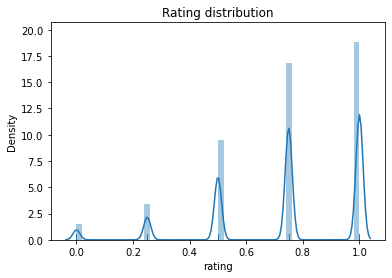

In [17]:
#Histogram

sns.distplot(scaled_compare_df.rating,rug=True).set_title('Rating distribution')

c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sentiment distribution')

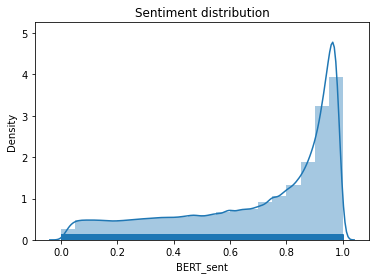

In [18]:
sns.distplot(scaled_compare_df.BERT_sent, bins=20, rug=True).set_title('Sentiment distribution')

In [19]:
# Definitely not normally distributed! Let's use the wilcoxen sign ranked
wilcoxon(x=scaled_compare_df.rating, y=scaled_compare_df.BERT_sent, zero_method='wilcox', correction=False)

WilcoxonResult(statistic=3438645611209.5, pvalue=0.0)

In [ ]:
# pvalue = 0.0 so reviewer's median sentiments definitely do not match their star rating!
# examples needed to show why this is correct.

In [20]:
# Let's also look at how correlated the ratings are to the sentiments
import scipy.stats

In [21]:
scipy.stats.pearsonr(x=scaled_compare_df.rating, y=scaled_compare_df.BERT_sent)
# The correaltion (pearson's r value) is 0.37, so there is a positive correalation,
#  but the p value is 0.0, so this correaltion is not statistically significant

(0.37651339747486234, 0.0)

In [23]:
# Spearman's will tell you if things are ranked the same. I.e. is the comparitive ranki
scipy.stats.spearmanr(scaled_compare_df.rating, scaled_compare_df.BERT_sent)

SpearmanrResult(correlation=0.35004039572456574, pvalue=0.0)

In [24]:
# The Kendall correlation coefficient compares the number of concordant and discordant pairs of data.
scipy.stats.kendalltau(x=scaled_compare_df.rating, y=scaled_compare_df.BERT_sent)

c:\Users\HP\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


KendalltauResult(correlation=0.2693828524993092, pvalue=0.0)

In [26]:
scipy.stats.spearmanr(scaled_compare_df.rating, scaled_compare_df.rating)

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [30]:
scipy.stats.kendalltau(scaled_compare_df.rating, scaled_compare_df.BERT_sent)[1]

0.0

In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [32]:
X = scaled_compare_df.iloc[:, 0].values.reshape(-1, 1)
Y = scaled_compare_df.iloc[:, 1].values.reshape(-1, 1)

In [33]:
model = LinearRegression()

In [39]:
model.fit(Y, X)

LinearRegression()

In [40]:
X_pred = model.predict(Y)

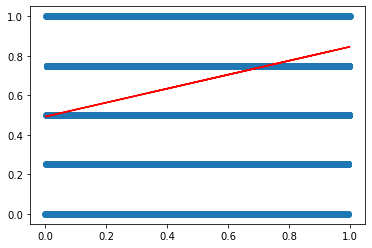

In [41]:
plt.scatter(Y, X)
plt.plot(Y, X_pred, color='red')
plt.show()